In [1]:
import sys
sys.path.append("../src")

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-10-01 07:45:53.322279: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-01 07:45:53.326657: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-01 07:45:53.339304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759315553.360151   18449 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759315553.368011   18449 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759315553.383407   18449 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from data import get_datasets

train_dataset, test_dataset, metadata = get_datasets(batch_size=32, img_size=(150, 150))

print(f"Classes: {metadata.features['label'].names}")
print(f"Treino: {len(list(train_dataset))} batches")
print(f"Teste: {len(list(test_dataset))} batches")

2025-10-01 07:45:57.847928: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Classes: ['cat', 'dog']


2025-10-01 07:45:58.118813: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-10-01 07:46:10.070290: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Treino: 582 batches
Teste: 146 batches


2025-10-01 07:46:13.272998: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# Callbacks e treinamento
from models import mlp
from train import train_model

mlp_model, mlp_history = train_model('mlp')

print("Treinamento concluído")


Epoch 1/50


/home/aluno/Trabalho/neural-networks-cats-vs-dogs/.venv/lib/python3.10/site-packages/keras/src/layers/pooling/base_global_pooling.py:12: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


582/582 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.5121 - loss: 0.7134 - val_accuracy: 0.5423 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 2/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.5208 - loss: 0.6967 - val_accuracy: 0.5370 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 3/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5278 - loss: 0.6942 - val_accuracy: 0.5357 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5306 - loss: 0.6932 - val_accuracy: 0.5346 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 5/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5305 - loss: 0.6929 - val_accuracy: 0.5286 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 6/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.5336 - loss: 0.6921 - val_accuracy: 0.5413 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 7/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5319 - loss: 0.6922

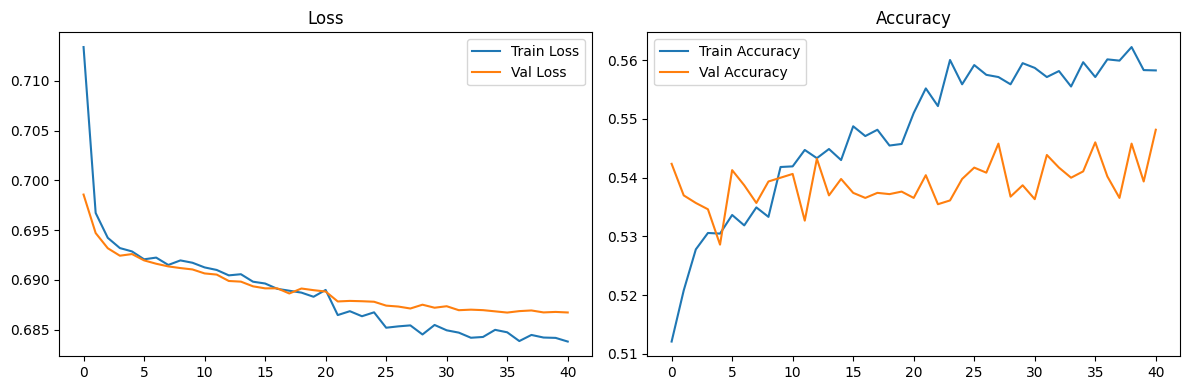

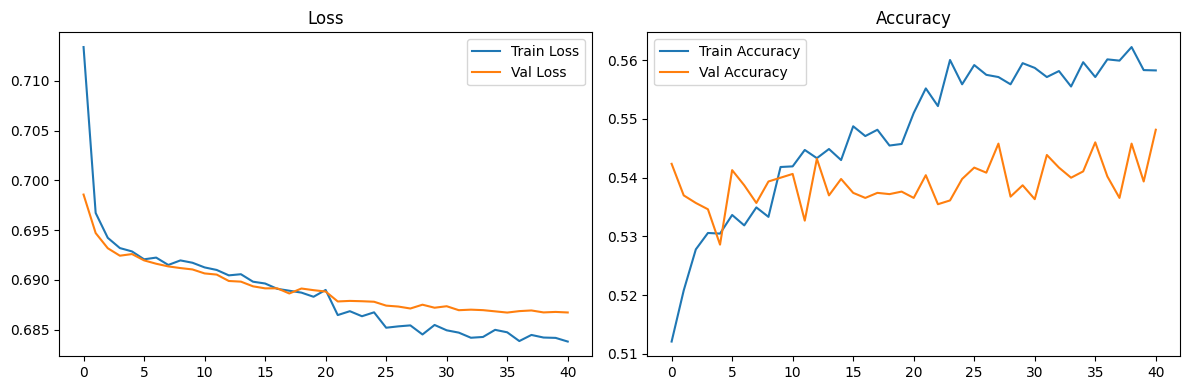

In [ ]:
from viz import plot_training_curves

plot_training_curves(mlp_history)

In [8]:
# Avaliação do modelo
print("=== AVALIAÇÃO MLP ===")

# Avaliar no conjunto de teste
test_loss, test_accuracy = mlp_model.evaluate(test_dataset, verbose=0)
print(f"Acurácia no teste: {test_accuracy:.4f}")
print(f"Loss no teste: {test_loss:.4f}")

# Previsões
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = mlp_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Matriz de confusão
from viz import plot_confusion_matrix

plot_confusion_matrix(y_true, y_pred, metadata.features['label'].names)
plt.savefig('../figures/mlp_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=metadata.features['label'].names))

=== AVALIAÇÃO MLP ===


NameError: name 'mlp_model' is not defined